In [34]:
import pandas as pd
import numpy as np
import yfinance as yf
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Aquisição de Dados

In [7]:
df = yf.download(['BPAC3.SA', 'PETR4.SA', 'OIBR3.SA', 'ITUB4.SA', 'BBDC4.SA'])['Close']

[*********************100%***********************]  5 of 5 completed


In [8]:
df.head()

,BBDC4.SA,BPAC3.SA,ITUB4.SA,OIBR3.SA,PETR4.SA
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,5.875
2000-01-04,NaN,NaN,NaN,NaN,5.550
2000-01-05,NaN,NaN,NaN,NaN,5.494
2000-01-06,NaN,NaN,NaN,NaN,5.475
2000-01-07,NaN,NaN,NaN,NaN,5.500


In [17]:
retornos = df.pct_change().loc['2018-01-01':]

In [18]:
retornos.head()

,BBDC4.SA,BPAC3.SA,ITUB4.SA,OIBR3.SA,PETR4.SA
Date,,,,,
2018-01-02,0.022157,0.091245,0.030528,-0.008265,0.027950
2018-01-03,0.004048,0.000000,0.006837,-0.027778,0.009064
2018-01-04,0.016407,0.000000,0.020826,-0.005712,0.001796
2018-01-05,0.005664,-0.028249,0.002880,0.005745,0.005977
2018-01-08,-0.000283,0.000000,-0.003316,-0.011428,0.011884


## Clusterização

### Normalização dos dados

In [26]:
from sklearn.preprocessing import normalize

retornos_normalizados = normalize(retornos)
retornos_normalizados = pd.DataFrame(retornos_normalizados, columns=retornos.columns)

retornos_normalizados.head()

,BBDC4.SA,BPAC3.SA,ITUB4.SA,OIBR3.SA,PETR4.SA
0,0.215229,0.886330,0.296543,-0.080282,0.271500
1,0.133676,0.000000,0.225786,-0.917365,0.299321
2,0.603632,0.000000,0.766222,-0.210154,0.066089
3,0.188047,-0.937934,0.095632,0.190746,0.198464
4,-0.016798,0.000000,-0.197172,-0.679446,0.706537


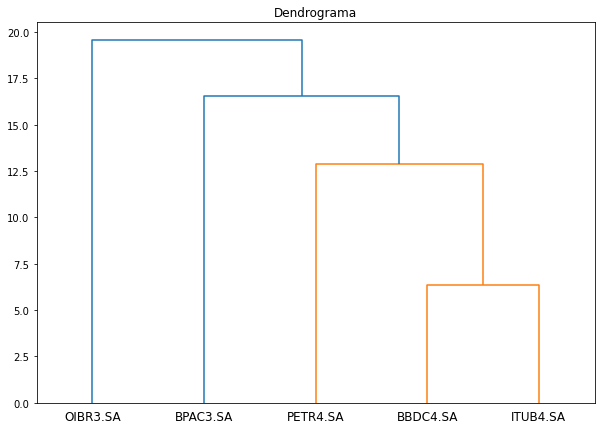

In [38]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")

clusters = shc.linkage(retornos_normalizados.T, method='ward', metric='euclidean')

dend = shc.dendrogram(clusters, labels=retornos.columns)

## Matrix Seriation

<AxesSubplot:>

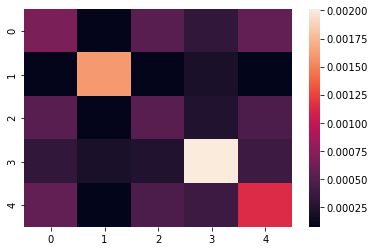

In [57]:
sns.heatmap(np.cov(retornos.T))

<AxesSubplot:>

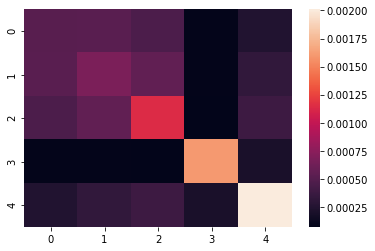

In [59]:
sns.heatmap(np.cov(retornos.loc[:,['OIBR3.SA', 'BPAC3.SA', 'PETR4.SA', 'BBDC4.SA', 'ITUB4.SA']].T[::-1]))